# Wine Classification

Myisha Chaudhry- 200591740

Kayleigh Habib - 200370580

Abigail Lee - 200469770


### Introduction

The purpose of this analysis is to determine how...

In [1]:
library(dplyr)
library(ggplot2)
library(corrplot)
library(tidyverse)
library(GGally)
#library(randomForest)
#library(tree)
#library(kernlab)      
#library(e1071)        


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


corrplot 0.92 loaded

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.6     ✔ purrr   0.3.4
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



### Load and Describe Data

The data used was retrieved from the University of California, Irvine (UCI) Machine Learning repository (https://archive.ics.uci.edu/ml/datasets/wine+quality) and represents data that was collected by the Institute of Radiology of the University Erlangen-Nuremberg, Germany.

In [2]:
# Load the data
red <- read.csv("winequality-red.csv", sep = ";")
white <- read.csv("winequality-white.csv", sep = ";")

In [3]:
head(red)
head(white)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
2,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
3,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
4,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
5,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
6,7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5


,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,7.0,0.27,0.36,20.7,0.045,45,170,1.0010,3.00,0.45,8.8,6
2,6.3,0.30,0.34,1.6,0.049,14,132,0.9940,3.30,0.49,9.5,6
3,8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1,6
4,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6
5,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6
6,8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1,6


In [4]:
red$type <- "red"
#head(red)
white$type<- "white"
#head(white)
data <- rbind(red, white)%>% 
  select(quality, everything()) #set quality in first column
data

quality,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,type
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
5,7.4,0.700,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,red
5,7.8,0.880,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,red
5,7.8,0.760,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,red
6,11.2,0.280,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,red
5,7.4,0.700,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,red
5,7.4,0.660,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,red
5,7.9,0.600,0.06,1.6,0.069,15,59,0.9964,3.30,0.46,9.4,red
7,7.3,0.650,0.00,1.2,0.065,15,21,0.9946,3.39,0.47,10.0,red
7,7.8,0.580,0.02,2.0,0.073,9,18,0.9968,3.36,0.57,9.5,red


In [5]:
# Look at the makeup of the data
str(data)
#6497 rows of 13 variables and 1 target (quality)

'data.frame':	6497 obs. of  13 variables:
 $ quality             : int  5 5 5 6 5 5 5 7 7 5 ...
 $ fixed.acidity       : num  7.4 7.8 7.8 11.2 7.4 7.4 7.9 7.3 7.8 7.5 ...
 $ volatile.acidity    : num  0.7 0.88 0.76 0.28 0.7 0.66 0.6 0.65 0.58 0.5 ...
 $ citric.acid         : num  0 0 0.04 0.56 0 0 0.06 0 0.02 0.36 ...
 $ residual.sugar      : num  1.9 2.6 2.3 1.9 1.9 1.8 1.6 1.2 2 6.1 ...
 $ chlorides           : num  0.076 0.098 0.092 0.075 0.076 0.075 0.069 0.065 0.073 0.071 ...
 $ free.sulfur.dioxide : num  11 25 15 17 11 13 15 15 9 17 ...
 $ total.sulfur.dioxide: num  34 67 54 60 34 40 59 21 18 102 ...
 $ density             : num  0.998 0.997 0.997 0.998 0.998 ...
 $ pH                  : num  3.51 3.2 3.26 3.16 3.51 3.51 3.3 3.39 3.36 3.35 ...
 $ sulphates           : num  0.56 0.68 0.65 0.58 0.56 0.56 0.46 0.47 0.57 0.8 ...
 $ alcohol             : num  9.4 9.8 9.8 9.8 9.4 9.4 9.4 10 9.5 10.5 ...
 $ type                : chr  "red" "red" "red" "red" ...


In [6]:
# get current column names
colnames(data)
#rename columns
names(data) <- c('quality','fixAcid','volAcid','citAcid','resSugar','chlor','freeSO2','totSO2','density','pH','sulphate','alcohol','type')
#check new column names and for any missing values
summary(data)

[1] "quality"              "fixed.acidity"        "volatile.acidity"    
 [4] "citric.acid"          "residual.sugar"       "chlorides"           
 [7] "free.sulfur.dioxide"  "total.sulfur.dioxide" "density"             
[10] "pH"                   "sulphates"            "alcohol"             
[13] "type"

    quality         fixAcid          volAcid          citAcid      
 Min.   :3.000   Min.   : 3.800   Min.   :0.0800   Min.   :0.0000  
 1st Qu.:5.000   1st Qu.: 6.400   1st Qu.:0.2300   1st Qu.:0.2500  
 Median :6.000   Median : 7.000   Median :0.2900   Median :0.3100  
 Mean   :5.818   Mean   : 7.215   Mean   :0.3397   Mean   :0.3186  
 3rd Qu.:6.000   3rd Qu.: 7.700   3rd Qu.:0.4000   3rd Qu.:0.3900  
 Max.   :9.000   Max.   :15.900   Max.   :1.5800   Max.   :1.6600  
    resSugar          chlor            freeSO2           totSO2     
 Min.   : 0.600   Min.   :0.00900   Min.   :  1.00   Min.   :  6.0  
 1st Qu.: 1.800   1st Qu.:0.03800   1st Qu.: 17.00   1st Qu.: 77.0  
 Median : 3.000   Median :0.04700   Median : 29.00   Median :118.0  
 Mean   : 5.443   Mean   :0.05603   Mean   : 30.53   Mean   :115.7  
 3rd Qu.: 8.100   3rd Qu.:0.06500   3rd Qu.: 41.00   3rd Qu.:156.0  
 Max.   :65.800   Max.   :0.61100   Max.   :289.00   Max.   :440.0  
    density             pH           sulp

### Feature Description

Fixed Acidity:

Volatile Acidity:

Citric Acid:

Residual Sugar:

Chlorides:

Free Sulfur Dioxide:

Total Sulfur Dioxide:

Density:

pH:

Sulphates:

Alcohol:

Quality:

Type:

### Data manipulation

In [7]:
# make dummy variable (0 = red, 1 = white)

# group the quality of data into 3 groups
# high, medium and low

# low = 3,4,5
# moderate = 6
# high = 7,8,9
data %>% group_by(quality)%>%summarise(count = n())

#redefine quality into 3 categories, and order their levels
wine_data<- data %>%
    mutate(type = ifelse(type == "red", 1,0),
          quality = case_when(quality >= 7 ~ "high",
                             quality == 6 ~ "mod",
                             TRUE ~ "low"),
          quality = factor(quality , levels=c("low", "mod", "high")))
  
head(wine_data)

quality,count
<int>,<int>
3,30
4,216
5,2138
6,2836
7,1079
8,193
9,5


,quality,fixAcid,volAcid,citAcid,resSugar,chlor,freeSO2,totSO2,density,pH,sulphate,alcohol,type
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,low,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,1
2,low,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,1
3,low,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,1
4,mod,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,1
5,low,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,1
6,low,7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,1


### Exploratory Data Analysis

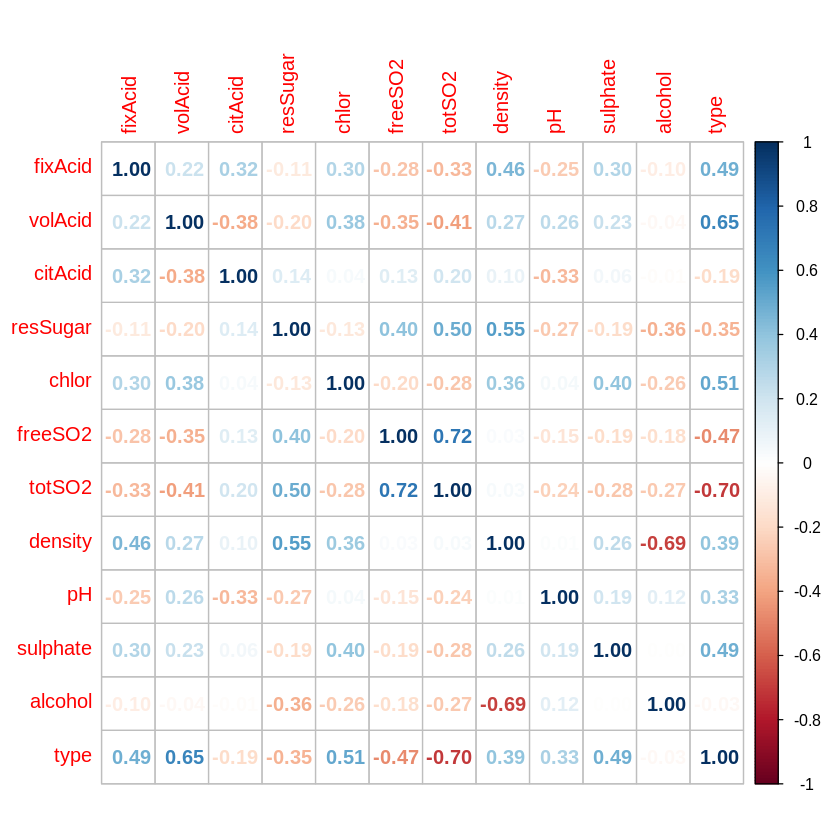

In [8]:
#Check correlation
n <- cor(wine_data %>% select(-quality),use = "complete.obs")
corrplot(n, method = "number")

In [9]:
# remove free sulfur dioxide as it is highly correlated with total sulfur dioxide
wine_data <- wine_data %>% select(-freeSO2)

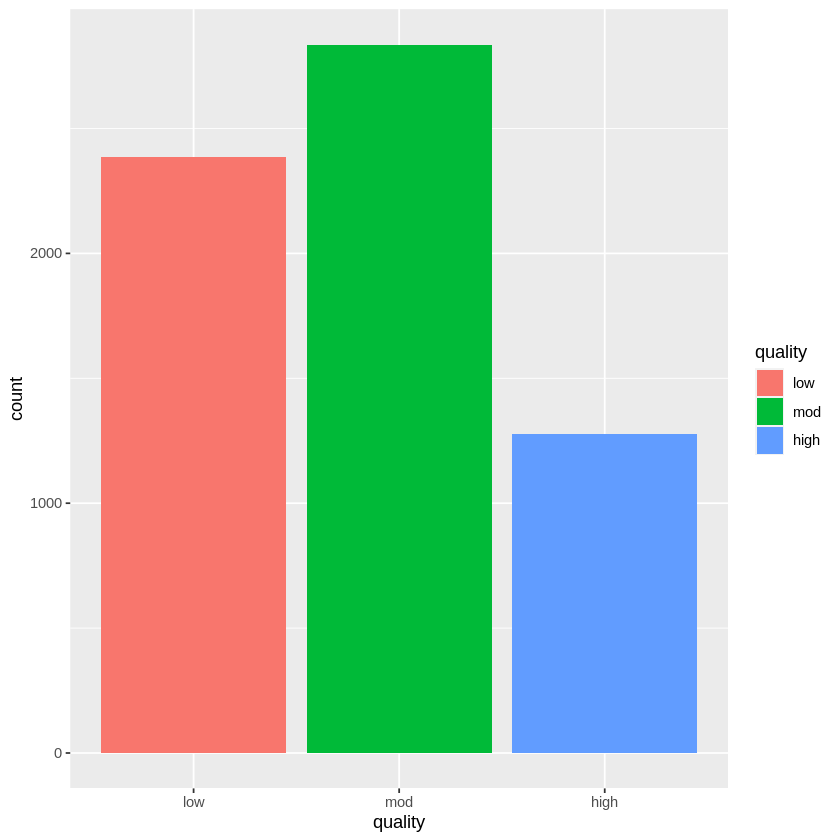

In [10]:
# look at the distributions of the quality class
wine_data$quality<-factor(wine_data$quality)
ggplot(data = wine_data, aes(x = quality, fill = quality))+
    geom_bar()

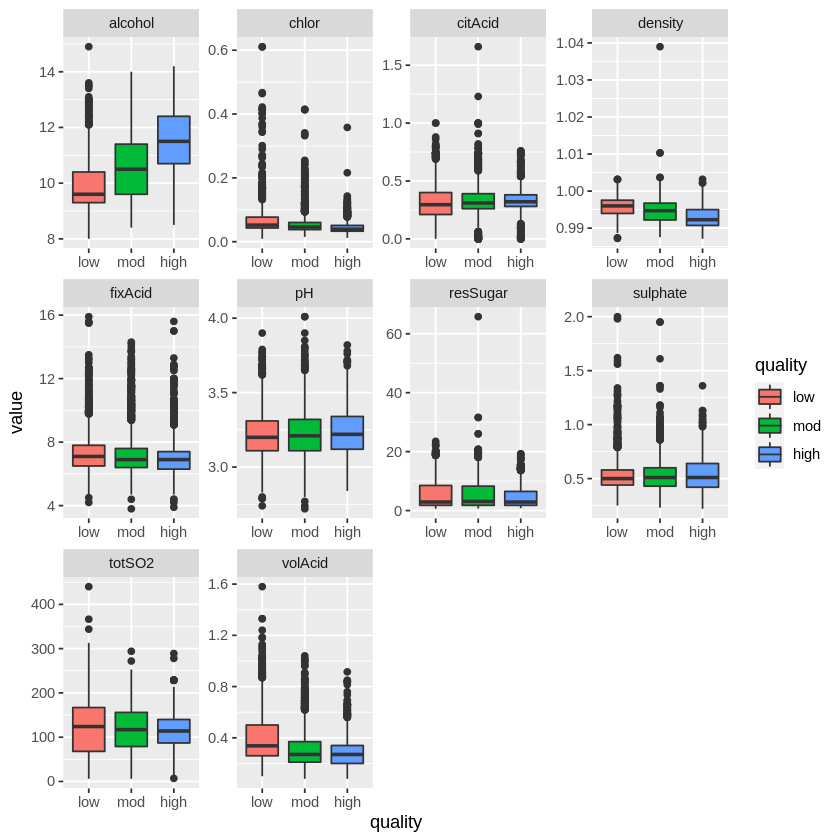

In [11]:
wine_data %>%
    pivot_longer(cols = fixAcid:alcohol, names_to = "variable", values_to = "value")%>%
    ggplot(aes(x = quality, y = value, fill = quality))+
    geom_boxplot()+
    facet_wrap(facets = ~variable, scales = "free")

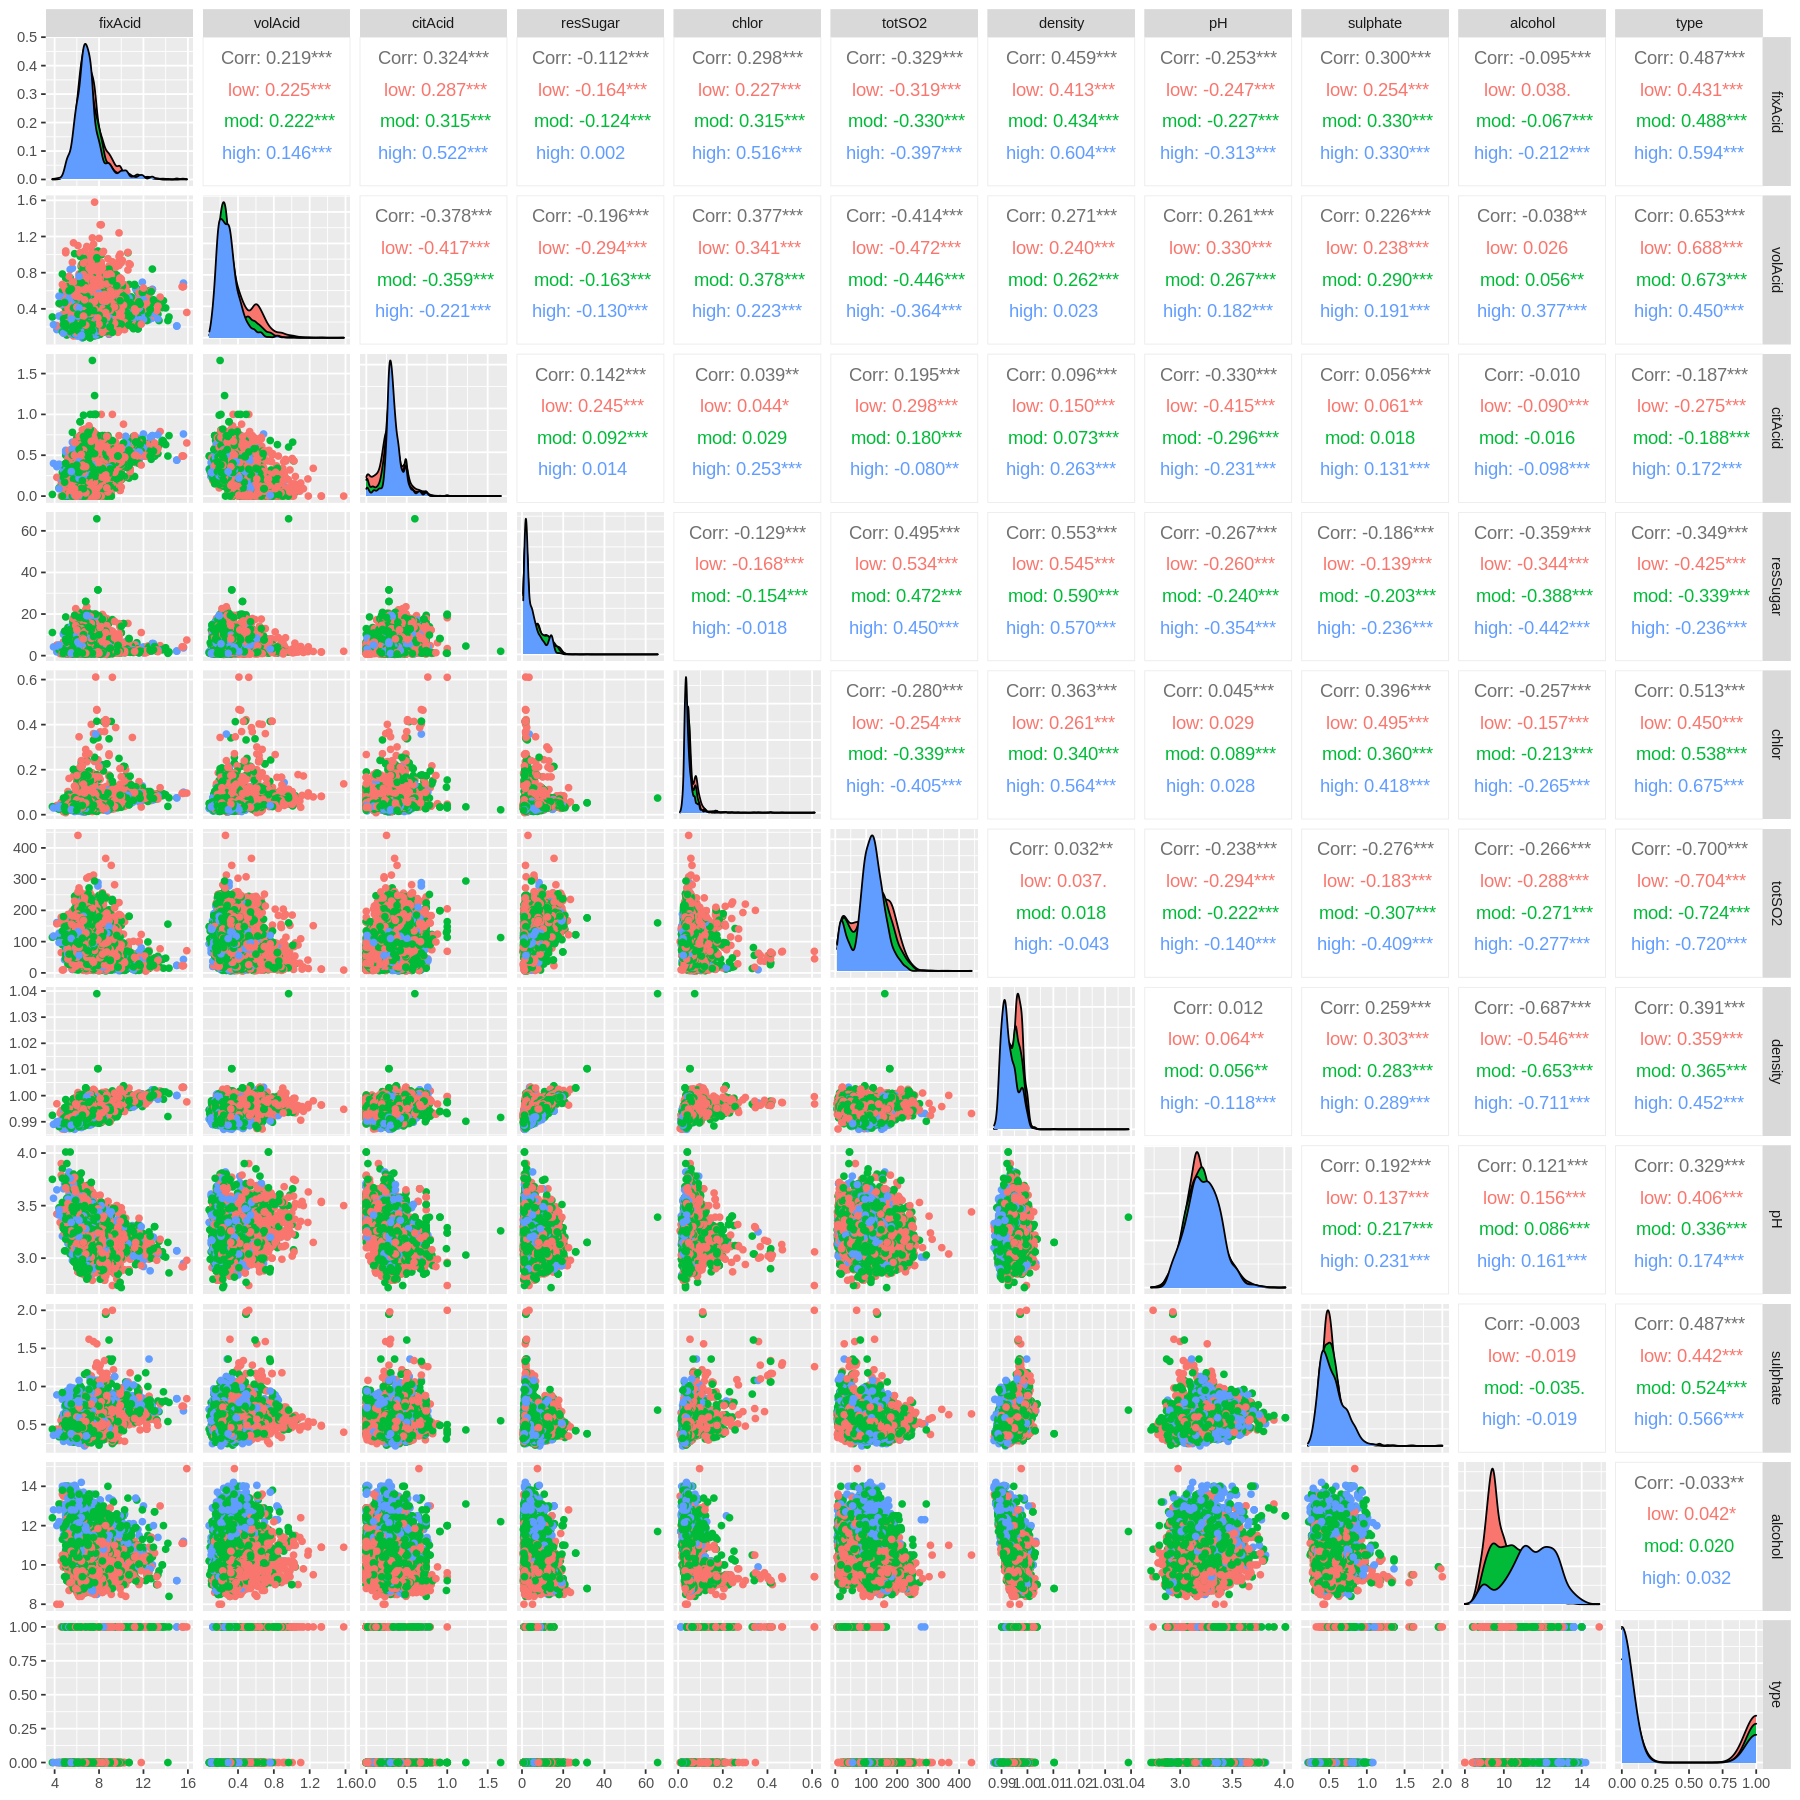

In [12]:
options(repr.plot.width=15, repr.plot.height=15)
ggpairs(data = wine_data, 
        columns = 2:ncol(wine_data), # this excludes the target variable which is in column 1
        mapping = aes(color = quality))

In [13]:
# PCA
# scale the data
wine_data_scaled <-  wine_data %>%
  mutate(across(where(is.numeric), scale))

wine_pca <- model.matrix(quality ~ ., data = wine_data_scaled)[,-1]
pca_total <- princomp(wine_pca)
pca_total

# To get the loadings (see how much each comp is made up of variables) 
# and the scores (converts each component into value)
unclass(pca_total$loadings)
#pca_total$scores 
summary(pca_total)
#Can probably use first 8 principal components which explain >95% of variation
# OR could use first 7 prinicipal components which explain >90% of variation

Call:
princomp(x = wine_pca)

Standard deviations:
   Comp.1    Comp.2    Comp.3    Comp.4    Comp.5    Comp.6    Comp.7    Comp.8 
1.8565995 1.5659555 1.2372084 0.9448287 0.8445093 0.7570003 0.7130537 0.6553291 
   Comp.9   Comp.10   Comp.11 
0.5359245 0.3738332 0.1569371 

 11  variables and  6497 observations.

,Comp.1,Comp.2,Comp.3,Comp.4,Comp.5,Comp.6,Comp.7,Comp.8,Comp.9,Comp.10,Comp.11
fixAcid,0.28768920,0.24687473,0.454615510,0.268760888,0.26186133,0.10353329,0.1799218883,0.24064849,0.518426476,0.25130515,0.275473669
volAcid,0.38704527,-0.04397922,-0.262591462,0.334237204,-0.01188130,-0.27145109,-0.3497820829,0.54551844,-0.338493048,0.24225746,0.023707621
citAcid,-0.10658230,0.24947162,0.578614989,-0.287990480,0.10144655,0.29363549,-0.4421558212,0.15180439,-0.439410068,-0.02103385,0.009334223
resSugar,-0.20835742,0.44525329,-0.235025684,0.031226330,0.34422075,-0.36877355,-0.3200820342,-0.36935012,0.007864149,0.05572228,0.453435603
chlor,0.34616905,0.17880694,0.036761512,-0.162720060,-0.68847544,-0.02091966,-0.4149914399,-0.23765516,0.331491485,0.08404671,0.016776437
totSO2,-0.38633537,0.24625384,-0.147595208,-0.227462670,-0.14643534,-0.15118280,-0.0534789003,0.63348969,0.345093506,-0.38504352,0.027634234
density,0.21880747,0.53529939,-0.193363054,-0.009266638,0.27787480,0.07076234,-0.0001645583,-0.06754400,0.076285352,-0.02627791,-0.731306224
pH,0.18511835,-0.25622821,-0.405636945,-0.502009312,0.34149755,0.44432890,-0.2143149895,0.09552091,0.222950209,0.19644331,0.161625927
sulphate,0.32229657,0.05595982,0.143576886,-0.629997773,0.04135566,-0.53382509,0.3790849818,0.05469174,-0.159030985,0.12147164,0.045382353
alcohol,-0.03994753,-0.47793845,0.297687512,-0.008617012,0.30535259,-0.42142991,-0.4271241305,-0.07119221,0.328598355,-0.11154102,-0.320190449


Importance of components:
                          Comp.1    Comp.2    Comp.3     Comp.4     Comp.5
Standard deviation     1.8565995 1.5659555 1.2372084 0.94482866 0.84450929
Proportion of Variance 0.3134084 0.2229631 0.1391746 0.08116715 0.06484598
Cumulative Proportion  0.3134084 0.5363715 0.6755461 0.75671321 0.82155919
                           Comp.6     Comp.7     Comp.8     Comp.9    Comp.10
Standard deviation     0.75700028 0.71305368 0.65532909 0.53592453 0.37383323
Proportion of Variance 0.05210342 0.04622944 0.03904748 0.02611448 0.01270662
Cumulative Proportion  0.87366261 0.91989205 0.95893953 0.98505402 0.99776063
                           Comp.11
Standard deviation     0.156937069
Proportion of Variance 0.002239367
Cumulative Proportion  1.000000000

In [14]:
print("Information for low:")
wine_quality_low <- wine_data_scaled %>%
            filter(quality == "low")
low_pca <- princomp(model.matrix(quality ~ ., 
                                 data = wine_quality_low)[,-1])
summary(low_pca)
#unclass(low_pca$loading)

print("Information for mod:")
wine_quality_mod<- wine_data_scaled %>%
            filter(quality == "mod")
mod_pca <- princomp(model.matrix(quality ~ ., 
                                 data = wine_quality_mod)[,-1])
summary(mod_pca)
#unclass(mod_pca$loading)


print("Information for high:")
wine_quality_high<- wine_data_scaled %>%
            filter(quality == "high")
high_pca <- princomp(model.matrix(quality ~ ., 
                                  data = wine_quality_high)[,-1])
summary(high_pca)
#unclass(high_pca$loading)

[1] "Information for low:"


Importance of components:
                          Comp.1    Comp.2    Comp.3    Comp.4     Comp.5
Standard deviation     2.0296922 1.4950627 1.1883700 1.0381119 0.88009421
Proportion of Variance 0.3568616 0.1936236 0.1223328 0.0933529 0.06709618
Cumulative Proportion  0.3568616 0.5504851 0.6728179 0.7661708 0.83326698
                           Comp.6     Comp.7     Comp.8     Comp.9   Comp.10
Standard deviation     0.72995738 0.70400012 0.63130253 0.56430713 0.3975280
Proportion of Variance 0.04615667 0.04293237 0.03452347 0.02758484 0.0136891
Cumulative Proportion  0.87942365 0.92235603 0.95687950 0.98446434 0.9981534
                           Comp.11
Standard deviation     0.146003133
Proportion of Variance 0.001846562
Cumulative Proportion  1.000000000

[1] "Information for mod:"


Importance of components:
                          Comp.1    Comp.2    Comp.3    Comp.4     Comp.5
Standard deviation     1.8052362 1.5277473 1.2189344 0.9108904 0.79081159
Proportion of Variance 0.3141801 0.2250161 0.1432423 0.0799913 0.06029157
Cumulative Proportion  0.3141801 0.5391962 0.6824385 0.7624298 0.82272138
                          Comp.6     Comp.7     Comp.8     Comp.9    Comp.10
Standard deviation     0.7490791 0.68443692 0.62102669 0.52435734 0.34619899
Proportion of Variance 0.0540961 0.04516244 0.03718186 0.02650729 0.01155479
Cumulative Proportion  0.8768175 0.92197992 0.95916178 0.98566907 0.99722386
                           Comp.11
Standard deviation     0.169693497
Proportion of Variance 0.002776137
Cumulative Proportion  1.000000000

[1] "Information for high:"


Importance of components:
                          Comp.1    Comp.2    Comp.3     Comp.4     Comp.5
Standard deviation     1.7322904 1.5203191 1.0746825 0.83673175 0.74499041
Proportion of Variance 0.3375116 0.2599661 0.1298996 0.07874442 0.06242358
Cumulative Proportion  0.3375116 0.5974778 0.7273773 0.80612173 0.86854531
                           Comp.6     Comp.7     Comp.8     Comp.9    Comp.10
Standard deviation     0.65856866 0.52059899 0.45081424 0.38412000 0.31330525
Proportion of Variance 0.04878086 0.03048274 0.02285823 0.01659515 0.01104035
Cumulative Proportion  0.91732617 0.94780891 0.97066714 0.98726229 0.99830263
                           Comp.11
Standard deviation     0.122846981
Proportion of Variance 0.001697369
Cumulative Proportion  1.000000000

## Model Building

### Split Data into Train and Test

In [15]:
# train has 80%
set.seed(0)
wine_data$rec <- seq.int(nrow(wine_data))
train <- sample_frac(wine_data,0.80)
train_index <- train$rec

# test and validate have 20% (10 for each)
test <- sample_frac(wine_data[-train_index,],0.50)
test_index <- test$rec

validation <- wine_data[-c(train_index,test_index),]

train <- train %>% select(-rec)
test <- test %>% select(-rec)
validation <- validation %>% select(-rec)

#dim(train)
#dim(test)
#dim(validation)

#IF USING PCA DATA, NEED TO CHANGE TO USE 
#wine_data_pca <- as.data.frame(pca_total$scores)
#wine_data_pca$quality <- wine_data_scaled$quality 
#THEN DO THE SPLITTING

## Model 1: Trees

Describe what trees are and all the different methods to be used

In [16]:
# decision trees, random forest, bagging

## Model 2: K - Nearest Neighbours

Describe what KNN is 

## Model 3: SVM

Describe what SVM is